# Temperature and Sunscreen Search Trends in California (2004–2024)

In this notebook, we explore the relationship between temperature trends and public interest in sunscreen in California from 2004 to 2024.

We use **`varunayan`** to easily extract monthly average temperature data for California from the ERA5 climate reanalysis dataset.

We aim to:
- Compare temperature data with Google Trends search queries for "sunscreen."
- Visualize time series of both temperature and search interest and identify potential lead-lag relationships.
- Explore regional patterns in temperature using raw high-resolution climate data (latitude-longitude based), which was obtained with the processed data from `varunayan`.

This study can help identify when and where sunscreen demand may rise, aiding in health awareness and regional sales planning.


## Step 1: Extract Monthly Temperature Data for California

We use the `varunayan` package to download ERA5 temperature data for the California region using a GeoJSON boundary. The data spans from January 2004 to December 2024, with monthly frequency and 0.1° spatial resolution.


In [1]:
import varunayan

df = varunayan.era5ify_geojson(
    request_id="temp_california_2004_2024",
    variables=["2m_temperature"],
    start_date="2004-1-1",
    end_date="2024-12-31",
    json_file="https://gist.githubusercontent.com/JaggeryArray/50ad17645a290ee4445e1113609de5e4/raw/91e97ec6ae6654093490df87a9802e359bf303b1/california.geojson",
    frequency="monthly",
    resolution=0.1
)


STARTING ERA5 SINGLE LEVEL PROCESSING
Request ID: temp_california_2004_2024
Variables: ['2m_temperature']
Date Range: 2004-01-01 to 2024-12-31
Frequency: monthly
Resolution: 0.1°
GeoJSON File: C:\Users\ATHARV~1\AppData\Local\Temp\temp_california_2004_2024_temp_geojson.json


--- GeoJSON Mini Map ---

MINI MAP (-124.45°W to -114.14°E, 32.53°S to 42.00°N):
┌─────────────────────────────────────────┐
│·········································│
│·■■■■■■■■■■■■■■■■■·······················│
│·■■■■■■■■■■■■■■■■■·······················│
│·■■■■■■■■■■■■■■■■■·······················│
│··■■■■■■■■■■■■■■■■·······················│
│···■■■■■■■■■■■■■■■·······················│
│···■■■■■■■■■■■■■■■■······················│
│·····■■■■■■■■■■■■■■■■····················│
│·······■■■■■■■■■■■■■■■■■·················│
│········■■■■■■■■■■■■■■■■■■■··············│
│···········■■■■■■■■■■■■■■■■■■■···········│
│···········■■■■■■■■■■■■■■■■■■■■■·········│
│·············■■■■■■■■■■■■■■■■■■■■■■······│
│···············■■■■■■■■■■

dbc527cd904c59dd9eb75ed248619a56.zip:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

db162004fe55130472aa4b4b0a19e376.zip:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

7427a1074f5224bada01bce9cd2bf2c1.zip:   0%|          | 0.00/1.04M [00:00<?, ?B/s]


Saving files to output directory: temp_california_2004_2024_output
  Saved final data to: temp_california_2004_2024_output\temp_california_2004_2024_monthly_data.csv
  Saved unique coordinates to: temp_california_2004_2024_output\temp_california_2004_2024_unique_latlongs.csv
  Saved raw data to: temp_california_2004_2024_output\temp_california_2004_2024_raw_data.csv

PROCESSING COMPLETE

RESULTS SUMMARY:
----------------------------------------
Variables processed: 1
Time period:         2004-01-01 to 2024-12-31
Final output shape:  (252, 3)
Total complete processing time: 91.41 seconds

First 5 rows of aggregated data:
          t2m  year  month
0  279.085327  2004      1
1  279.616730  2004      2
2  286.289825  2004      3
3  287.153900  2004      4
4  290.526306  2004      5

ERA5 SINGLE LEVEL PROCESSING COMPLETED SUCCESSFULLY


## Step 2: Create a Unified Date Column

We convert the `year` and `month` columns to a single `datetime` column for easier merging and plotting.


In [3]:
import pandas as pd

df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

## Step 3: Load Google Trends Data for "Sunscreen"

We import monthly Google Trends data that captures public search interest in the keyword “sunscreen” for California from 2004 onward. This data could be replaced by sales data of any product too.


In [4]:
df_trend = pd.read_csv("https://gist.githubusercontent.com/JaggeryArray/05a2ffb206ae6ada04f5187c15d77d45/raw/99b5dac0efed5c3fa56c0221e2352aa2e358e17f/multiTimeline_california_googletrends_sunscreen_2004-now.csv")

## Step 4: Convert Month Strings to Datetime Format

The Trends dataset has a `Month` column as a string. We convert it into a `datetime` object to align with the ERA5 data.


In [4]:
df_trend['date'] = pd.to_datetime(df_trend['Month'], format='%Y-%m')

## Step 5: Merge ERA5 and Google Trends Data

We perform an inner join on the `date` column to combine temperature and search interest into a single DataFrame.


In [5]:
df_merged = pd.merge(df, df_trend, on='date', how='inner')

In [6]:
def setup_matplotlib():
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        raise ImportError(
            "Matplotlib is not installed. Install it with: pip install matplotlib"
        )

    plt.rcParams["figure.dpi"] = 300
    plt.rcParams["savefig.dpi"] = 300
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.sans-serif"] = ["Arial"]
    plt.rcParams["axes.labelweight"] = "normal"

    plt.rcParams["mathtext.fontset"] = "custom"
    plt.rcParams["mathtext.rm"] = "Arial"
    plt.rcParams["mathtext.it"] = "Arial:italic"
    plt.rcParams["mathtext.bf"] = "Arial:bold"

## Step 7: Visualize Temperature vs Sunscreen Search Trends

We create a dual-axis plot:
- Temperature (K) is shown on the left Y-axis.
- Log-transformed sunscreen search interest is plotted on the right Y-axis.

This allows us to visually inspect whether warmer months coincide with increased sunscreen interest.


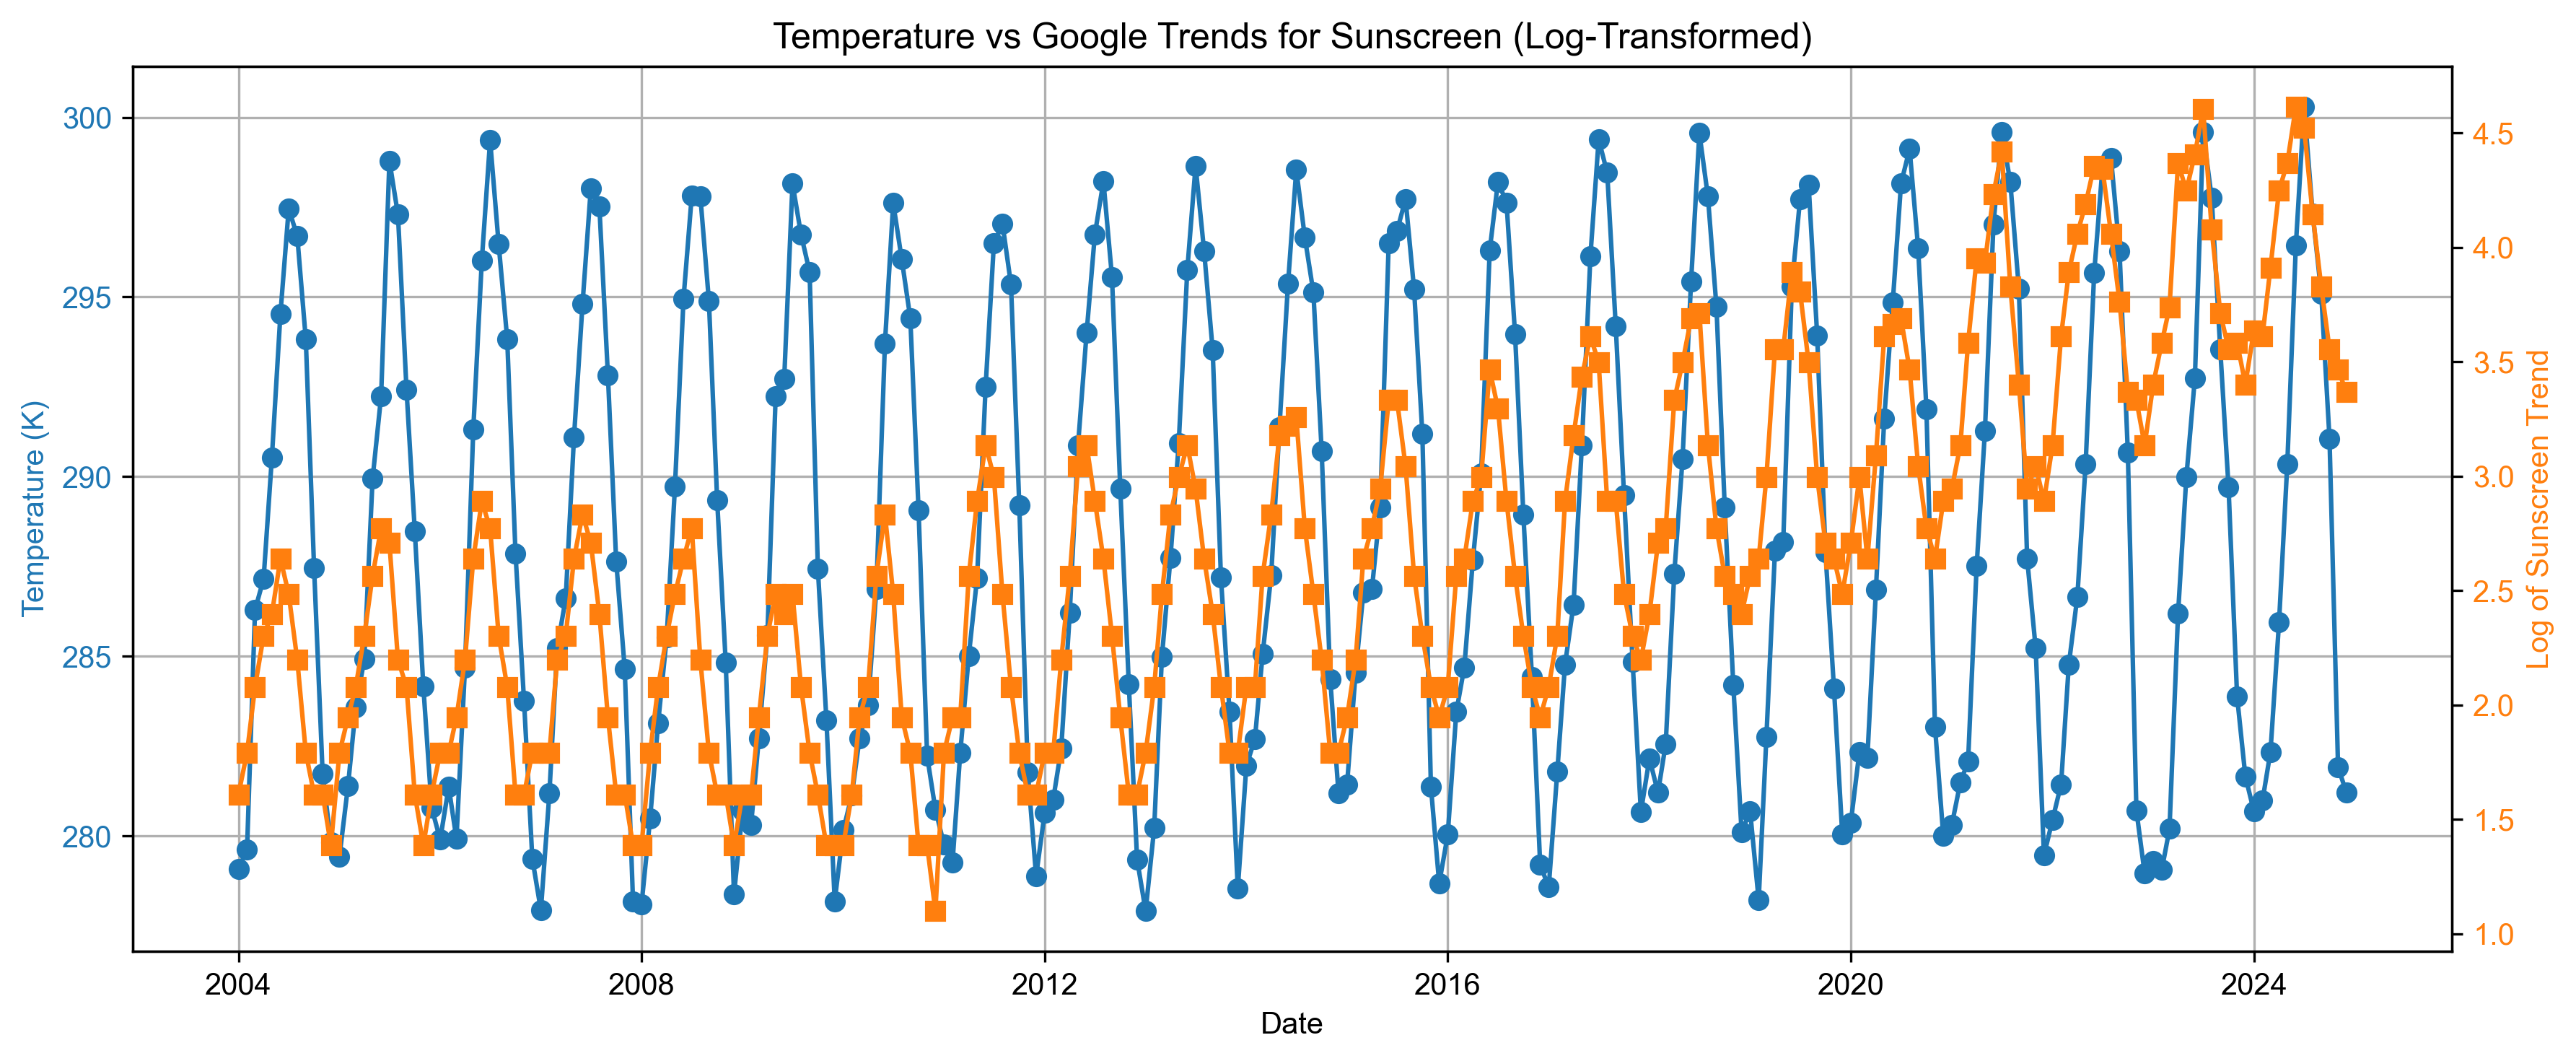

In [7]:
import numpy as np
import matplotlib.pyplot as plt

setup_matplotlib()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot t2m on left y-axis
ax1.plot(df_merged['date'], df_merged['t2m'], color='tab:blue', marker='o', label='Temperature (t2m)')
ax1.set_ylabel('Temperature (K)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Apply log transform to sunscreen
sunscreen_log = np.log(df_merged['sunscreen'] + 1)  # Add 1 to avoid log(0)

# Plot on right y-axis
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], sunscreen_log, color='tab:orange', marker='s', label='Sunscreen (log-scaled)')
ax2.set_ylabel('Log of Sunscreen Trend', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and grid
plt.title('Temperature vs Google Trends for Sunscreen (Log-Transformed)')
ax1.set_xlabel('Date')
ax1.grid(True)
fig.tight_layout()

plt.show()


> The above plot shows that there is close relation between the Google trend for the search "sunscreen" and temperature in California.

## Step 8: Cross-Correlation Analysis (CCF)

We standardize both variables and compute the cross-correlation function (CCF) over lags from -12 to +12 months. This helps identify if temperature changes lead or lag public interest in sunscreen.


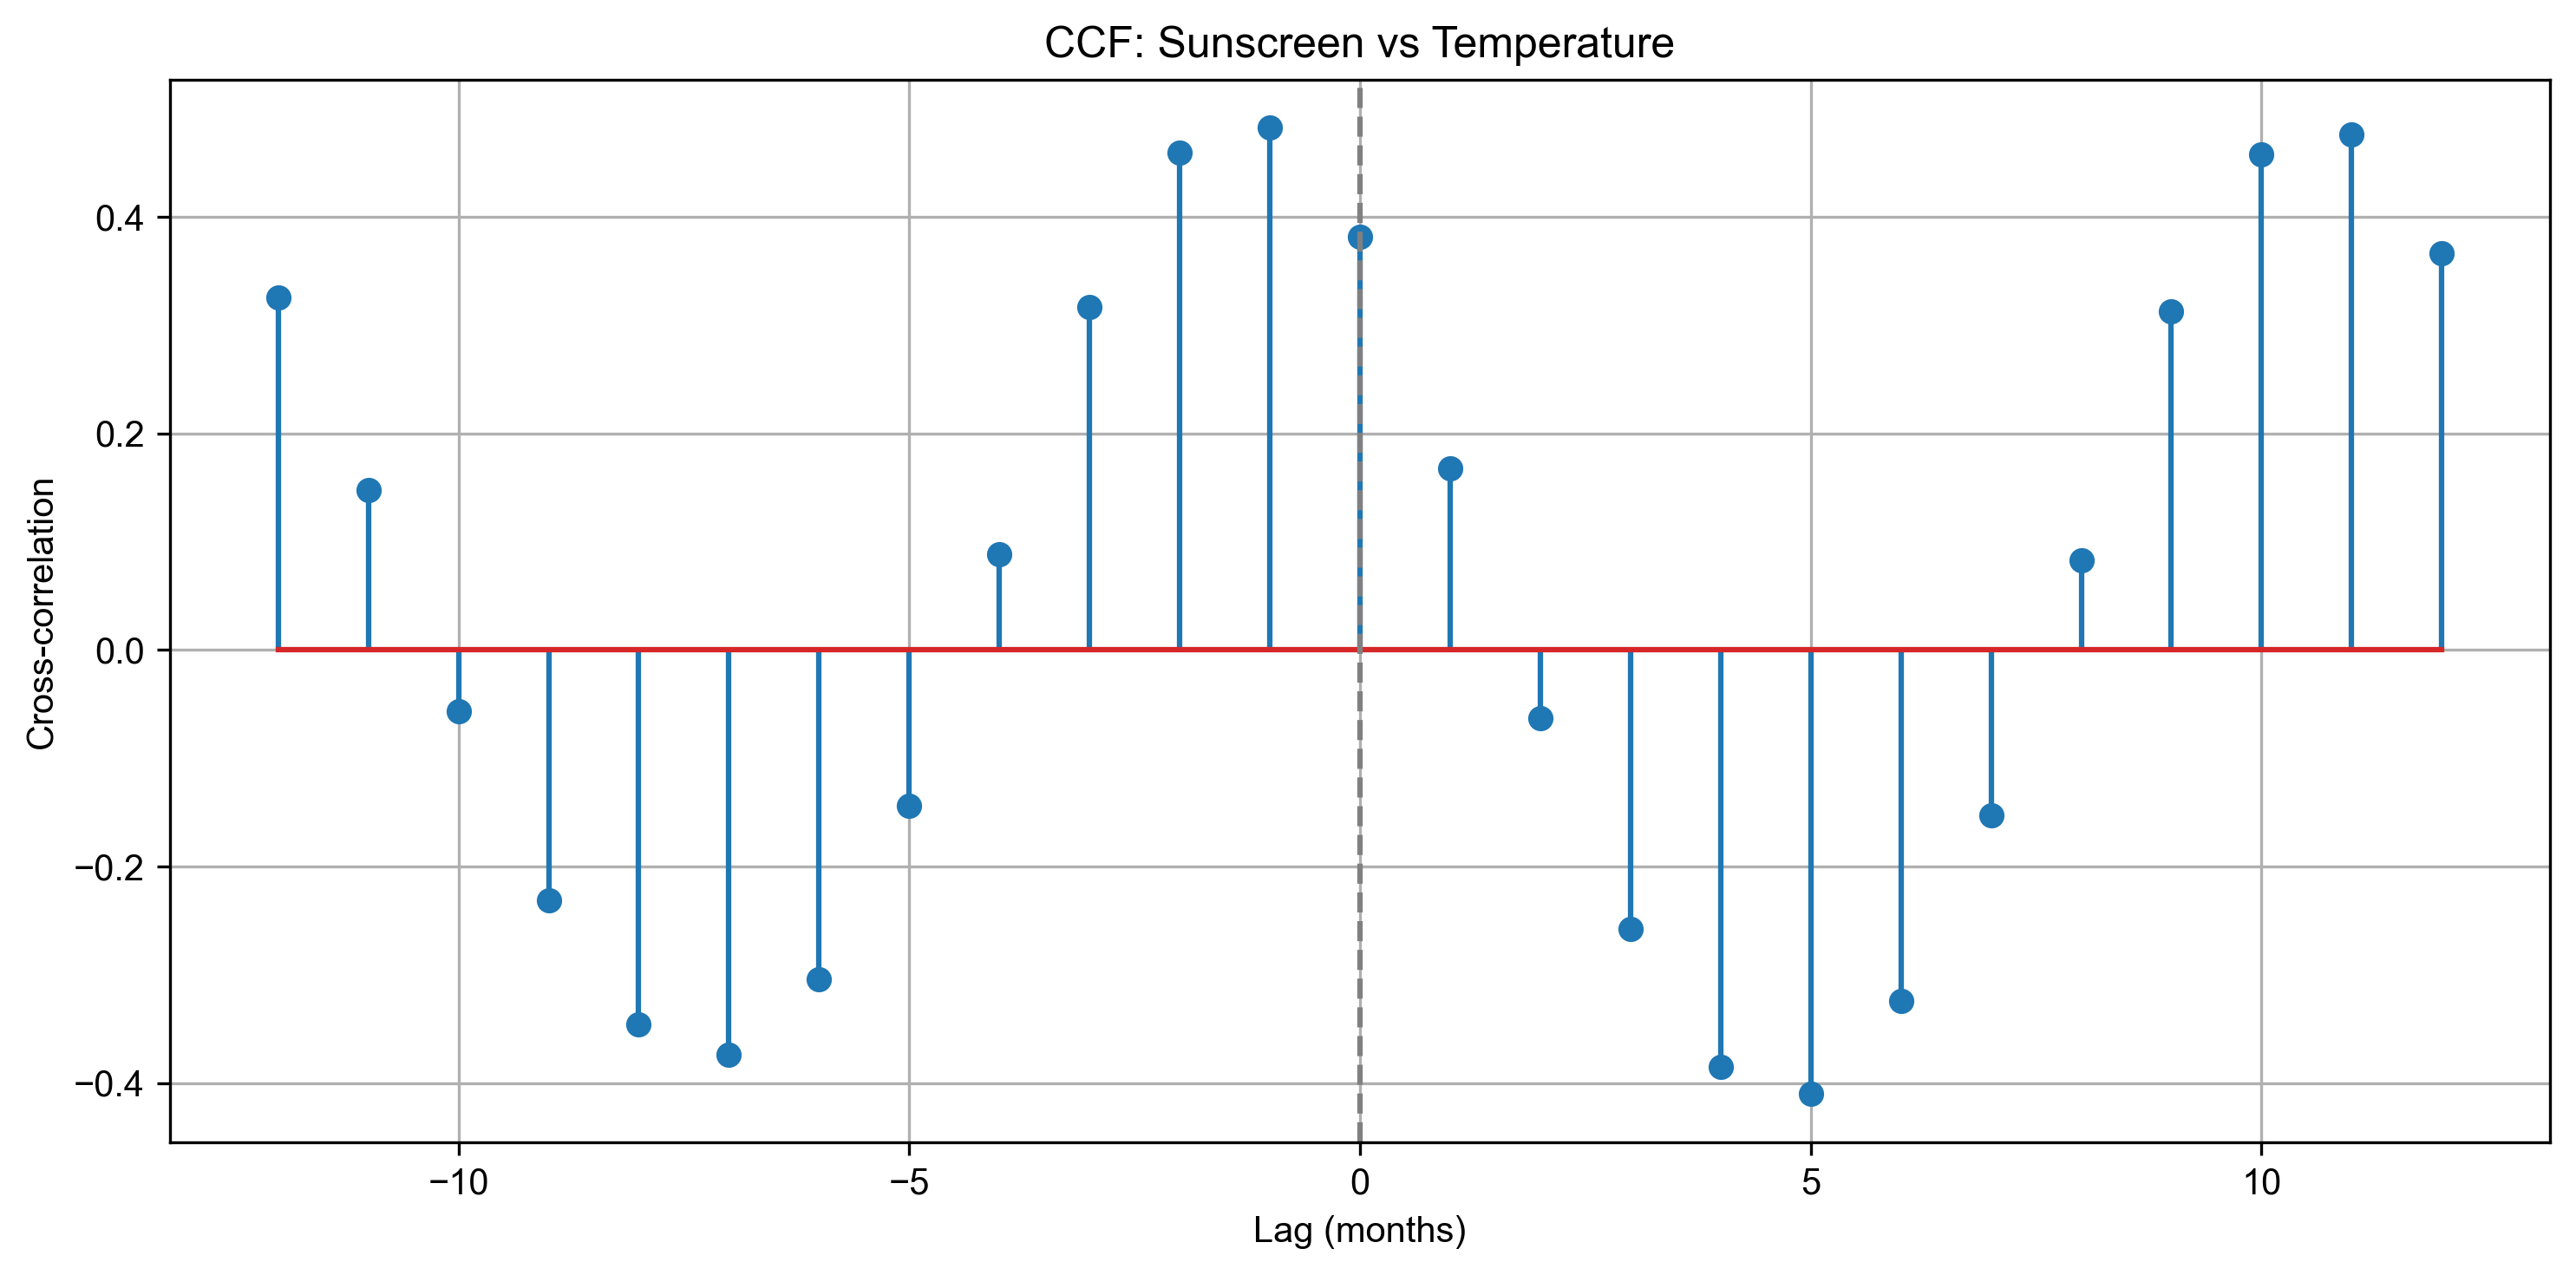

In [8]:
import numpy as np

t2m = (df_merged['t2m'] - df_merged['t2m'].mean()) / df_merged['t2m'].std()
sunscreen = (df_merged['sunscreen'] - df_merged['sunscreen'].mean()) / df_merged['sunscreen'].std()

# Full cross-correlation
corr = np.correlate(sunscreen - sunscreen.mean(), t2m - t2m.mean(), mode='full')
lags = np.arange(-len(sunscreen)+1, len(sunscreen))
corr = corr / (len(sunscreen) * sunscreen.std() * t2m.std())  # Normalize

lag_limit = 12
mask = (lags >= -lag_limit) & (lags <= lag_limit)
lags_limited = lags[mask]
corr_limited = corr[mask]

# Plot
plt.figure(figsize=(10, 5))
plt.stem(lags_limited, corr_limited)
plt.xlabel('Lag (months)')
plt.ylabel('Cross-correlation')
plt.title('CCF: Sunscreen vs Temperature')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


> The cross-correlation plot (CCF) shows that **public interest in sunscreen tends to peak about one month before** surface temperatures reach their maximum.  
> This suggests that people **anticipate the heat** and start searching or preparing for summer **in advance** (a month before the peak to be exact).

## Step 9: Load Raw ERA5 Temperature Data (Hourly, Grid-based)

We load the raw gridded data (hourly values at individual lat-long points) extracted from the `temp_california_2004_2024_raw_data.csv` file for spatial analysis.


In [9]:
raw_df = pd.read_csv("temp_california_2004_2024_output/temp_california_2004_2024_raw_data.csv")

## Step 10: Filter June and July

To study spatial temperature distribution during peak sunscreen usage months, we isolate June and July data from the full hourly dataset.


In [10]:
raw_df['date'] = pd.to_datetime(raw_df['date'])

# Filter June (6) and July (7)
raw_df_summer = raw_df[raw_df['date'].dt.month.isin([6, 7])]

## Step 11: Calculate Mean Temperature at Each Location

We group the summer data by latitude and longitude to compute the average temperature for June and July across all years.


In [11]:
raw_df_avg = raw_df_summer.groupby(['latitude', 'longitude'])['t2m'].mean().reset_index()

## Step 12: Visualize Spatial Distribution of Summer Temperatures

We create a heatmap of average June–July temperature (t2m) across California, revealing spatial patterns in heat intensity that may affect sunscreen demand.


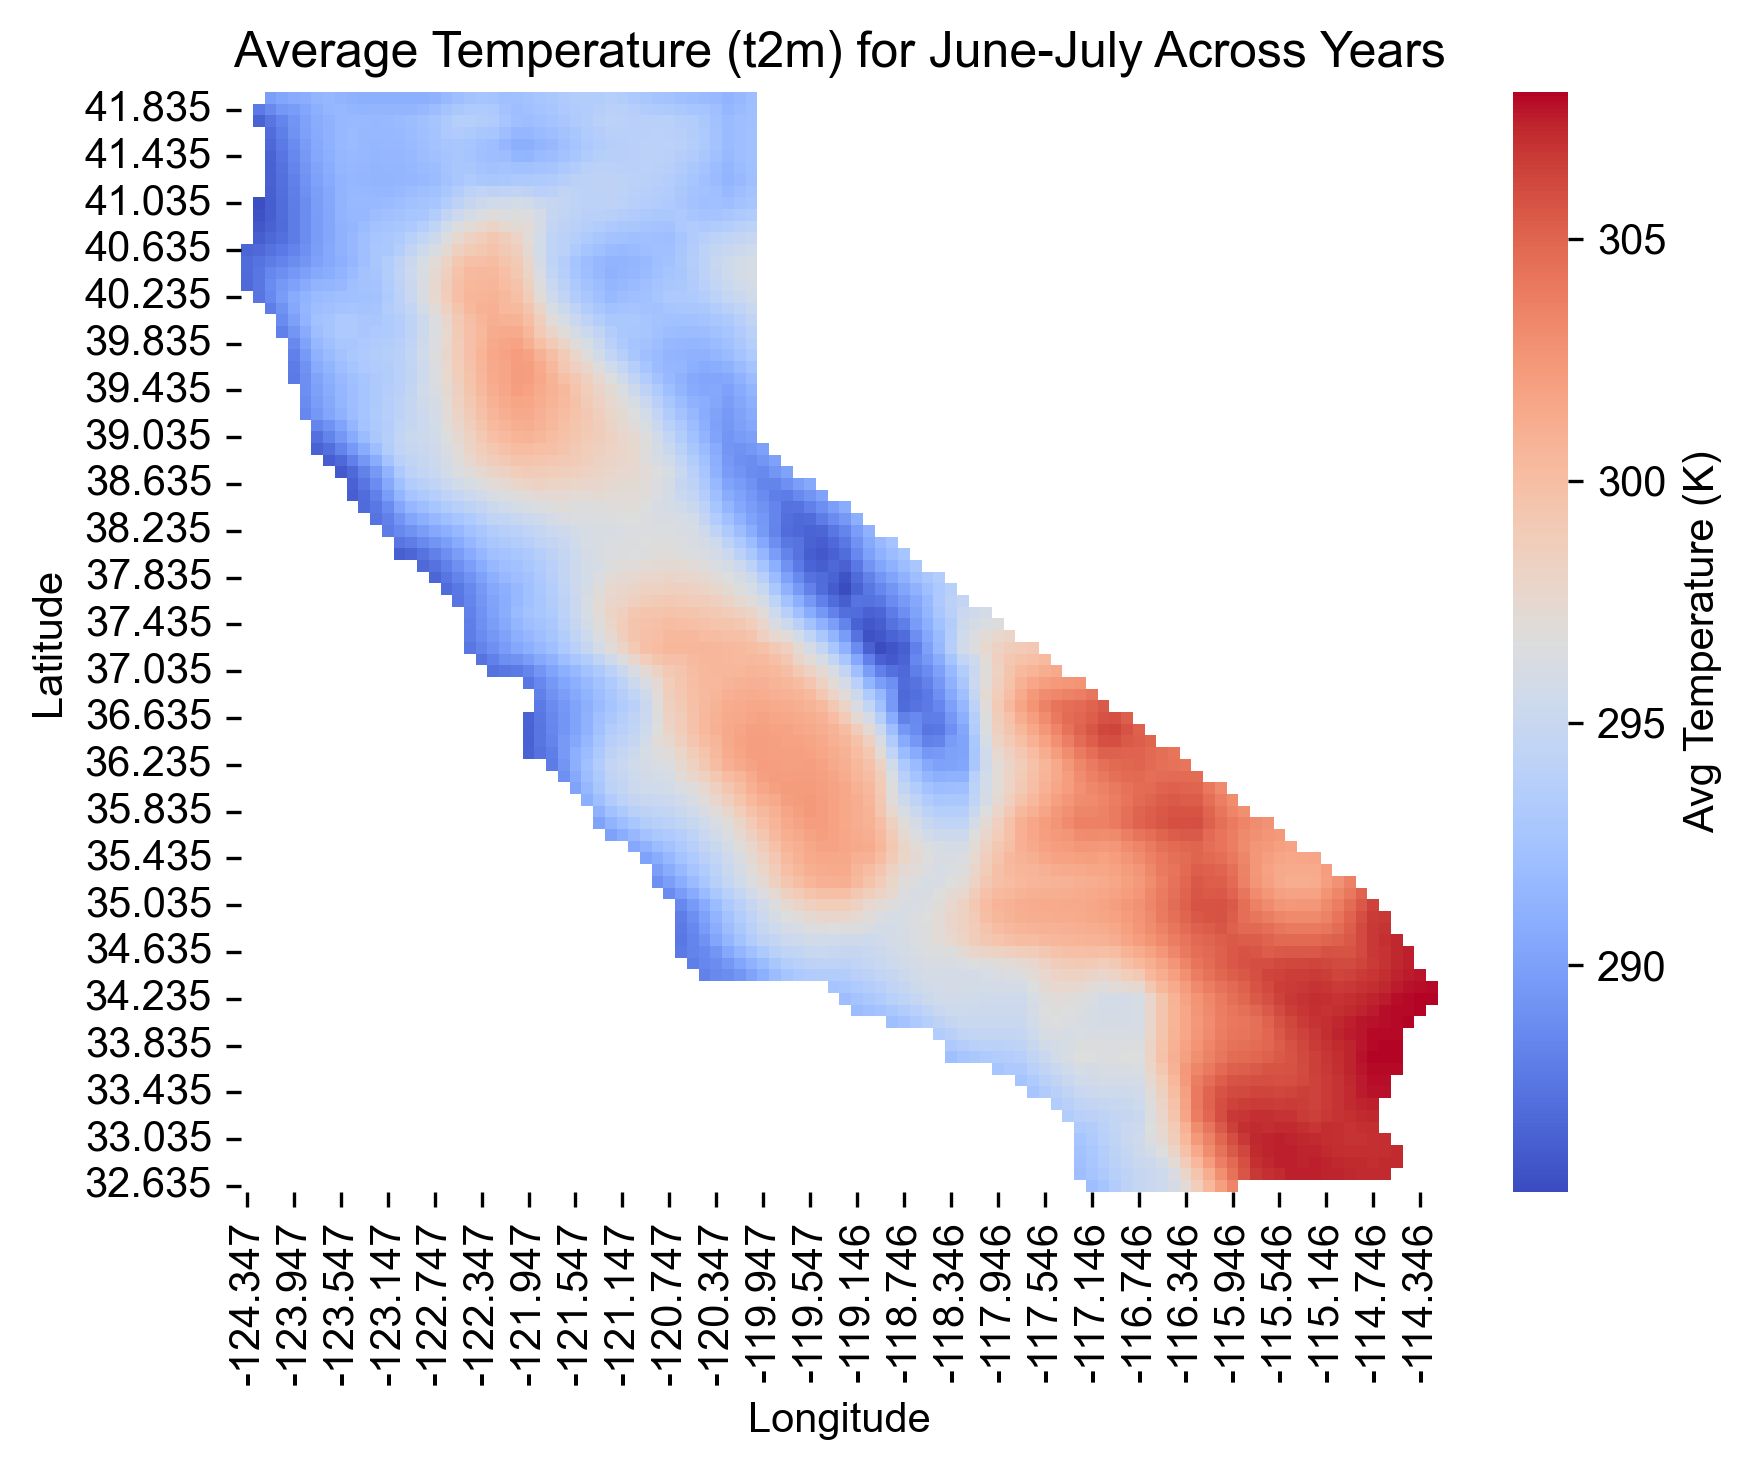

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

setup_matplotlib()

# Pivot data for heatmap
heatmap_data = raw_df_avg.pivot(index='latitude', columns='longitude', values='t2m')

# Plot heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(
    heatmap_data,
    cmap='coolwarm',
    cbar_kws={'label': 'Avg Temperature (K)'}
)

# Format tick labels to 3 decimal places
ax.set_xticklabels([f"{float(label.get_text()):.3f}" for label in ax.get_xticklabels()])
ax.set_yticklabels([f"{float(label.get_text()):.3f}" for label in ax.get_yticklabels()])

plt.title('Average Temperature (t2m) for June-July Across Years')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
